Dataset organized kindly by user Mourad. https://www.kaggle.com/msheriey/104-flowers-garden-of-eden

# import

In [46]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import random

# global variables

In [19]:
IMAGE_DIMENSION = 192
VECTOR_LEN = IMAGE_DIMENSION**2
NUM_CLASS = 104

TRAIN_DIR = f'data/jpeg-{IMAGE_DIMENSION}x{IMAGE_DIMENSION}/train'
VAL_DIR = f'data/jpeg-{IMAGE_DIMENSION}x{IMAGE_DIMENSION}/val'
#TEST_DIR = f'data/jpeg-{IMAGE_DIMENSION}x{IMAGE_DIMENSION}/test/test'

TRAIN_BATCH_SIZE = 128
VAL_BATCH_SIZE = 128
#TEST_BATCH_SIZE = 32

# generate datasets

In [3]:
def generate_train_dataset():
    train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        TRAIN_DIR,
        target_size=(IMAGE_DIMENSION, IMAGE_DIMENSION), 
        batch_size=TRAIN_BATCH_SIZE,
        shuffle=False
    )
    
    return next(train_generator)
        
def generate_val_dataset():
    val_generator = ImageDataGenerator().flow_from_directory(
        VAL_DIR,
        target_size=(IMAGE_DIMENSION, IMAGE_DIMENSION),
        batch_size=VAL_BATCH_SIZE,
        shuffle=False
    )
    
    return next(val_generator)
        
def generate_test_dataset():
    test_generator = ImageDataGenerator().flow_from_directory(
        TEST_DIR,
        target_size=(IMAGE_DIMENSION, IMAGE_DIMENSION),
        batch_size=TEST_BATCH_SIZE,
        shuffle=False
    )
    
    return next(test_generator)

In [4]:
train_img, train_lb = generate_train_dataset()
val_img, val_lb = generate_val_dataset()
#test_img, test_lb = generate_test_dataset()

Found 12753 images belonging to 104 classes.
Found 3712 images belonging to 104 classes.


# explore data

In [5]:
train_img.shape, train_lb.shape

((32, 192, 192, 3), (32, 104))

# preprocessing

In [6]:
train_img.shape, train_lb.shape

((32, 192, 192, 3), (32, 104))

In [7]:
print(np.shape(train_img))
print(np.shape(train_lb))
print(np.shape(val_img))
print(np.shape(val_lb))

(32, 192, 192, 3)
(32, 104)
(32, 192, 192, 3)
(32, 104)


In [8]:
train_img_unrow = train_img.reshape(TRAIN_BATCH_SIZE, -1).T
np.shape(train_img_unrow)

(110592, 32)

In [9]:
val_img_unrow = val_img.reshape(VAL_BATCH_SIZE, -1).T
np.shape(val_img_unrow)

(110592, 32)

# cnn

In [20]:
# Build the model with multiple hidden layers
model_1 = models.Sequential()
model_1.add(layers.Conv2D(filters=32, 
                        kernel_size=(2,2),
                        strides=(1,1),
                        activation='relu',
                        padding = 'same',
                        input_shape=(IMAGE_DIMENSION, IMAGE_DIMENSION, 3),
                        data_format = 'channels_last'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2),
                     strides=2))
model_1.add(layers.Flatten())        
# possibly more layers here

model_1.add(layers.Dense(NUM_CLASS)) # output layer
model_1.add(layers.Activation('sigmoid'))

In [21]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 192, 192, 32)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 96, 96, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 294912)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 104)               30670952  
_________________________________________________________________
activation_1 (Activation)    (None, 104)               0         
Total params: 30,671,368
Trainable params: 30,671,368
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Define an optimizer, cost lost function, and scoring metric
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
model_1.fit(train_img, train_lb, epochs=50, batch_size=TRAIN_BATCH_SIZE)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 641ms/step - loss: 0.6871 - accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 304ms/step - loss: 0.1124 - accuracy: 0.5625
Epoch 3/50
1/1 [==============================] - 0s 284ms/step - loss: 0.0076 - accuracy: 0.9062
Epoch 4/50
1/1 [==============================] - 0s 269ms/step - lo

In [24]:
val_loss, val_acc = model_1.evaluate(val_img, val_lb)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 193ms/step - loss: 1.0577 - accuracy: 0.9688


Probably some overfitting in this cnn model. Will try adding more layers to this and see if that reduces overfitting

In [25]:
# Build the model with multiple hidden layers
model_2 = models.Sequential()
model_2.add(layers.Conv2D(filters=32, 
                        kernel_size=(2,2),
                        strides=(1,1),
                        activation='relu',
                        padding = 'same',
                        input_shape=(IMAGE_DIMENSION, IMAGE_DIMENSION, 3),
                        data_format = 'channels_last'))
model_2.add(layers.MaxPooling2D(pool_size=(2,2),
                     strides=2))
model_2.add(layers.Flatten())        
# possibly more layers here
model_2.add(layers.Dense(128))
model_2.add(layers.Activation('relu'))
model_2.add(layers.Dense(NUM_CLASS)) # output layer
model_2.add(layers.Activation('sigmoid'))

In [26]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 192, 192, 32)      416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 96, 96, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 294912)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               37748864  
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 104)               13416     
_________________________________________________________________
activation_3 (Activation)    (None, 104)              

In [27]:
# Define an optimizer, cost lost function, and scoring metric
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
model_2.fit(train_img, train_lb, epochs=50, batch_size=TRAIN_BATCH_SIZE)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 646ms/step - loss: 0.6904 - accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 255ms/step - loss: 2.4139 - accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 247ms/step - loss: 1.5871 - accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 242ms/s

In [29]:
val_loss, val_acc = model_2.evaluate(val_img, val_lb)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 155ms/step - loss: 1.6603 - accuracy: 0.7812


# data augmentation

running into overfitting issues. will augment data to reduce overfitting

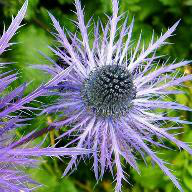

In [32]:
# display a sample image
array_to_img(train_img[0])

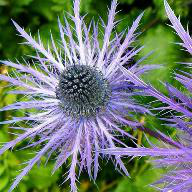

In [35]:
def augment(image):
    image = np.fliplr(image)
    
    return image

array_to_img(augment(train_img[0]))

In [93]:
def augment_dataset(dataset):
    augmented_dataset = dataset[0]
    print(augmented_dataset)
    
    for img in dataset:
        if random.choice([0,1]):
            img = np.fliplr(img)
            
        else:
            pass
        
        np.append(augmented_dataset, img, axis=0)
        
    return augmented_dataset

In [94]:
new_array = augment_dataset(train_img)

[[[0.24705884 0.3019608  0.17254902]
  [0.2392157  0.29411766 0.15294118]
  [0.21568629 0.28235295 0.10980393]
  ...
  [0.36862746 0.49803925 0.18039216]
  [0.4039216  0.5411765  0.21176472]
  [0.41960788 0.5686275  0.23529413]]

 [[0.227451   0.2784314  0.1764706 ]
  [0.2392157  0.2901961  0.17254902]
  [0.24313727 0.30588236 0.16078432]
  ...
  [0.43921572 0.5686275  0.25882354]
  [0.46274513 0.6        0.28627452]
  [0.4666667  0.6117647  0.29803923]]

 [[0.1764706  0.21960786 0.15686275]
  [0.20392159 0.25490198 0.1764706 ]
  [0.2392157  0.29803923 0.18431373]
  ...
  [0.45882356 0.58431375 0.29803923]
  [0.454902   0.5882353  0.29803923]
  [0.44705886 0.5882353  0.29803923]]

 ...

 [[0.5411765  0.40784317 0.7803922 ]
  [0.5411765  0.40784317 0.77647066]
  [0.5058824  0.37647063 0.7176471 ]
  ...
  [0.2627451  0.48235297 0.0627451 ]
  [0.36862746 0.6117647  0.08235294]
  [0.47450984 0.7294118  0.11764707]]

 [[0.5568628  0.41960788 0.8117648 ]
  [0.53333336 0.40000004 0.7803922 ]


In [75]:
def print_img(dataset):
    for img in dataset:
        array_to_img(img)
        
    return array_to_img(img)

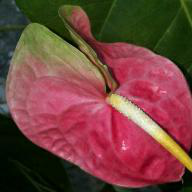

In [76]:
print_img(train_img)